<a href="https://colab.research.google.com/github/sarveshmalagi/tensorflow_practice/blob/master/tf_mnist_gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

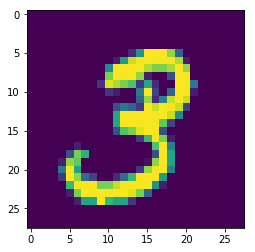

In [5]:
plt.imshow(mnist.train.images[1].reshape(28, 28))

In [0]:
def generator(z, reuse=None):
  
  with tf.variable_scope('gen', reuse=reuse):
    hidden1 = tf.layers.dense(inputs=z, units=128)
    
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1, hidden1)
    
    hidden2 = tf.layers.dense(inputs=hidden1, units=128)
    hidden2 = tf.maximum(alpha*hidden2, hidden2)
    
    output = tf.layers.dense(hidden2, units=784, activation=tf.nn.tanh)
    
    return output

In [0]:
def discriminator(X, reuse=None):
  
  with tf.variable_scope('dis', reuse=reuse):
    hidden1 = tf.layers.dense(inputs=X, units=128)
    
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1, hidden1)
    
    hidden2 = tf.layers.dense(inputs=hidden1, units=128)
    hidden2 = tf.maximum(alpha*hidden2, hidden2)
    
    logits = tf.layers.dense(hidden2, units=1)
    output = tf.sigmoid(logits)
    
    return output, logits

In [0]:
real_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

In [9]:
G = generator(z)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
D_output_real, D_logits_real = discriminator(real_images)

In [0]:
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [0]:
def loss_func(logits_in, labels_in):
  
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

In [13]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
D_loss = D_real_loss + D_fake_loss

In [0]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [0]:
learning_rate = 0.001

In [0]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)

In [0]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [0]:
batch_size = 100

In [0]:
epochs = 500

In [0]:
init = tf.global_variables_initializer()

In [0]:
samples = []

In [0]:
with tf.Session() as sess:
  
  sess.run(init)
  
  for epoch in range(epochs):
    
    num_batches = mnist.train.num_examples // batch_size
    
    for i in range(num_batches):
      
      batch = mnist.train.next_batch(batch_size)
      
      batch_images = batch[0].reshape((batch_size, 784))
      batch_images = batch_images * 2 - 1
      
      batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
      
      _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z:batch_z})
      
      _ = sess.run(G_trainer, feed_dict={z:batch_z})
      
    print('ON EPOCH {}'.format(epoch))
    
    sample_z = np.random.uniform(-1, 1, size=(1, 100))
    gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
    
    samples.append(gen_sample)

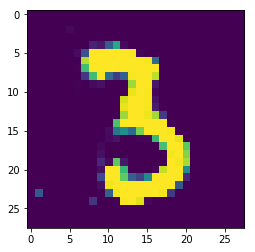

In [50]:
plt.imshow(samples[496].reshape(28, 28))